# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 8. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

---


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов за контест и 20 баллов за ноутбук
* Задача 2 &mdash; 40 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 80 баллов

In [1]:
# Bot check

# HW_ID: fpmi_ad8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps


sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/python/07_random.html" target="_blank">обучающий ноутбук</a> по работе с вероятностными распределениями и генерации случайных чисел в Питоне. 

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.


**Части 1-3**

Условие задачи в контесте, ссылка на который отправлена через бот.
Далее можно использовать как свою реализацию функций, так и библиотечную.

In [53]:
def coin(count):
    return np.array([sps.bernoulli.rvs(p=0.5) for _ in range(count)])

# генерации случайных величин из равномерного распределения на отрезке [0, 1]
def uniform(size, precision=30):
    coins = coin(precision * np.prod(size)).reshape((np.prod(size), precision))
    powers = 2 ** np.arange(1, precision + 1)

    data = (np.dot(coins, powers) / (2 ** (precision + 1))).reshape(size)
    return data

# генерации случайных величин в количестве size штук из распределения 
# N(loc,scale^2) с помощью преобразования Бокса-Мюллера.
def normal(size, loc=0, scale=1, precision=30):
    uniform1 = uniform((np.prod(size),), precision)
    uniform2 = uniform((np.prod(size),), precision)

    z = np.sqrt(-2 * np.log(uniform1)) * np.cos(2 * np.pi * uniform2)

    random_values = loc + scale * z
    return random_values.reshape(size)

# генерация выборки из экспоненциального распределения
def expon(size, lambd=1, precision=30):
    uniform1 = uniform((np.prod(size),), precision)

    random_values = -1 * np.log(1 - uniform1) / lambd
    return random_values.reshape(size)

**Часть 4**


Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам. Для построения графика необходимо брать достаточно большое количество точек сетки.

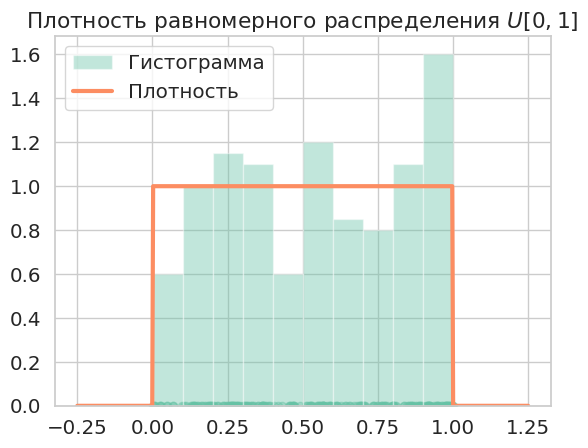

In [77]:
size = 200
u = uniform(200)
grid = np.linspace(-0.25, 1.25, 500)

plt.figure()
plt.scatter(u, np.zeros(size), alpha=0.4)
plt.hist(u, density=True, bins=10, alpha=0.4, label='Гистограмма')
plt.plot(grid, sps.uniform.pdf(grid), lw=3, label='Плотность')
plt.title('Плотность равномерного распределения $U[0, 1]$')
plt.legend()
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision` в написанной ранее вами функции.

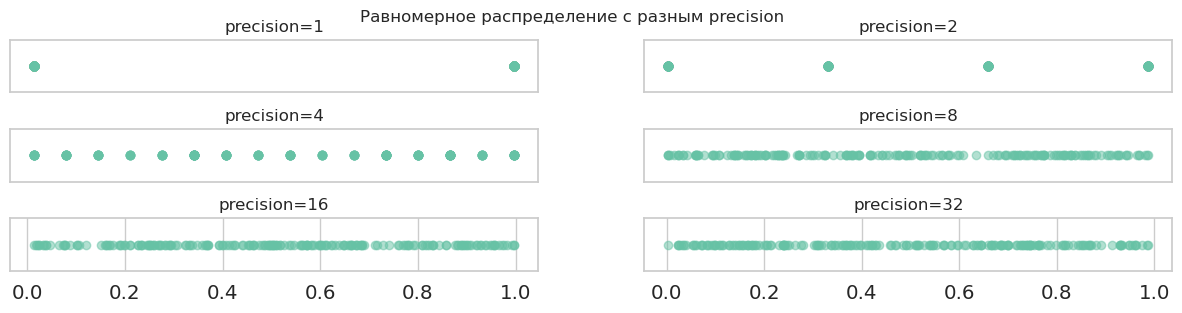

In [51]:
size = 200
plt.figure(figsize=(15, 3))
plt.suptitle('Равномерное распределение с разным precision', fontsize=12)
plt.subplots_adjust(hspace=0.7)

for i, precision in enumerate([1, 2, 4, 8, 16, 32]):
    ax = plt.subplot(3, 2, i + 1)

    plt.scatter(uniform(size, precision), np.zeros(size), alpha=0.5)
    ax.set_title(f'precision={precision}', fontsize=12)
    plt.yticks([])
    if i < 4:
        plt.xticks([])

Чем больше значение `precision`, тем больше распределение становится похожим на непрерывное.

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

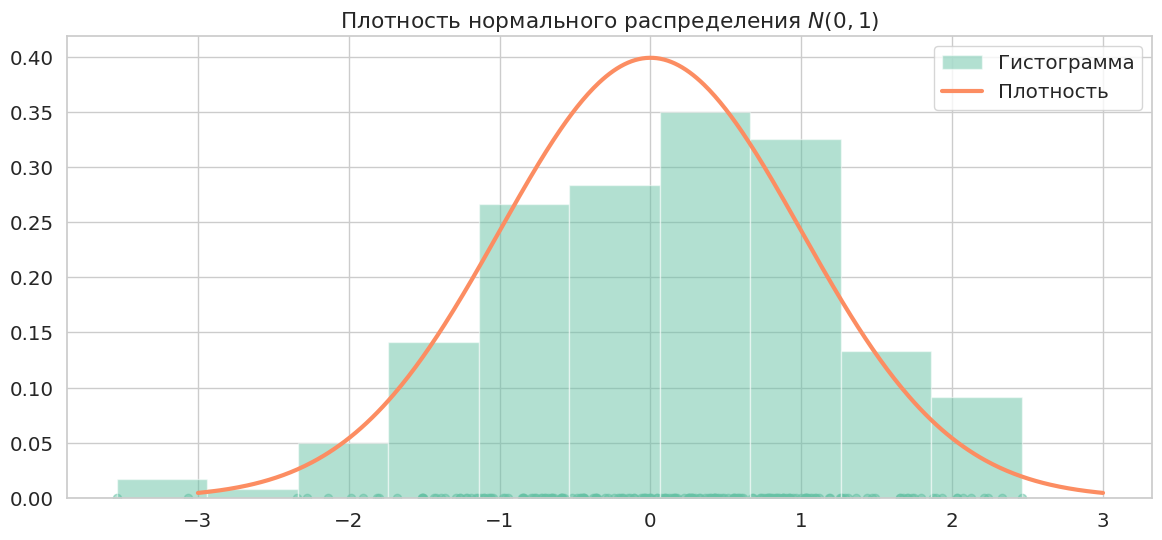

In [76]:
size = 200
norm = normal(size)
grid = np.linspace(-3, 3, 500)

plt.figure(figsize=(14, 6))
plt.title('Плотность нормального распределения $N(0,1)$')
plt.scatter(norm, np.zeros(size), alpha=0.5)
plt.hist(norm, density=True, bins=10, alpha=0.5, label='Гистограмма')
plt.plot(grid, sps.norm.pdf(grid), lw=3, label='Плотность')
plt.legend(loc='upper right')
plt.show()

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

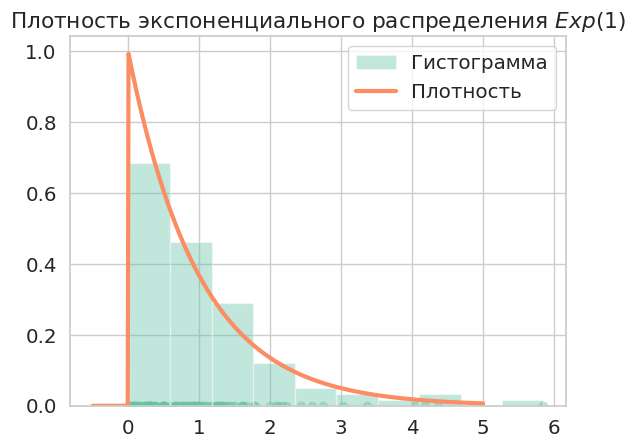

In [74]:
size = 100
e = expon(size)
grid = np.linspace(-0.5, 5, 500)

plt.figure()
plt.title('Плотность экспоненциального распределения $Exp(1)$')
plt.scatter(e, np.zeros(size), alpha=0.4)
plt.hist(e, density=True, bins=10, alpha=0.4, label='Гистограмма')
plt.plot(grid, sps.expon.pdf(grid), lw=3, label='Плотность')
plt.legend()
plt.show()

**Выводы:**

- Сгенерированные выборки из распределений совпали с теоретическими.
- При большой точности дискретное распределение стремится к непрерывному.

**Дополнение при работе над ошибками**:
- Мы увидели, что из с помощью равномерного распределения можно получить нормальное и экспоненциальное.

---

### Задача 2.

Рассмотрим <a target="_black" href="https://ru.wikipedia.org/wiki/Распределение_Коши">распределение Коши</a> с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими <a target="_black" href="https://en.wikipedia.org/wiki/Heavy-tailed_distribution">тяжелыми хвостами</a>. Иначе говоря, плотность убывает медленно при $x \to \infty$ (точное определение может различаться для разных источников). Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

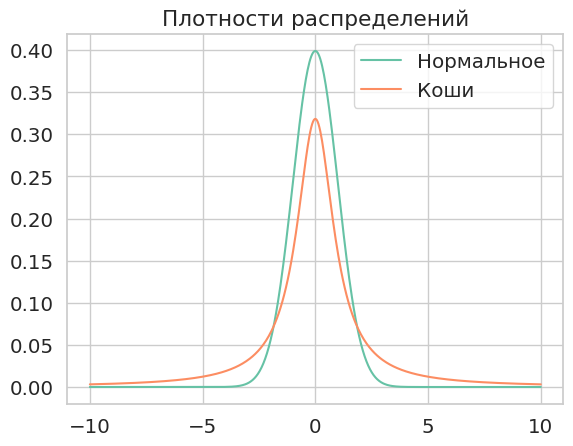

In [2]:
points = np.linspace(-10, 10, 500)
plt.figure()
plt.plot(points, sps.norm.pdf(points))
plt.plot(points, sps.cauchy.pdf(points))
plt.title('Плотности распределений')
plt.legend(['Нормальное', 'Коши'])
plt.show()

Видим, что плотность распределения Коши убывает медленнее, чем плотность нормального.

**2.** Повторите эксперимент с <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

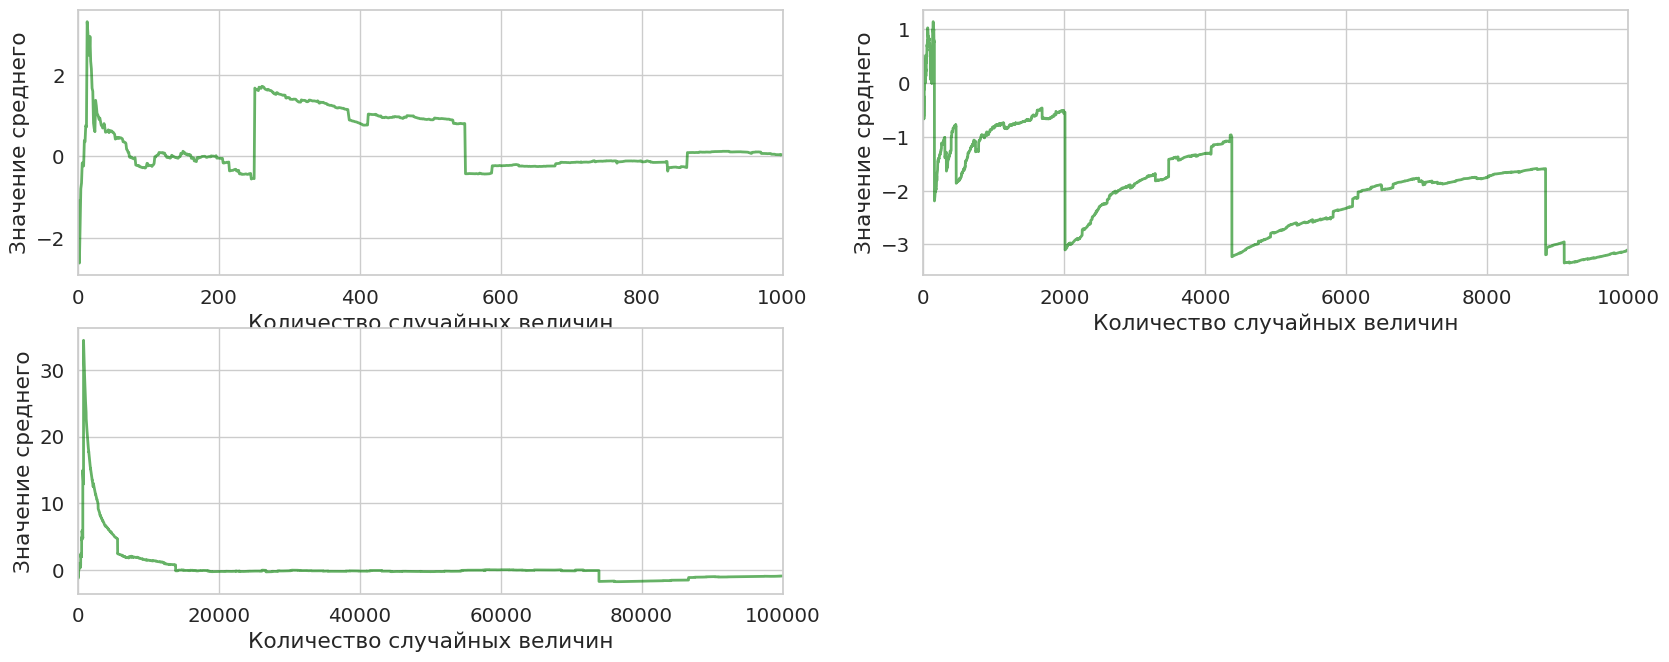

In [9]:
sizes = [1000, 10000, 50000, 150000] # количество случайных величин
plt.figure(figsize=(20, 20))

for i in range(len(sizes)):
    samples = sps.cauchy().rvs(size=sizes[i])
    cum_means = samples.cumsum() / (np.arange(sizes[i]) + 1)
    plt.subplot(5, 2, i + 1)
    plt.plot(np.arange(sizes[i]) + 1, cum_means, color='green', alpha=0.6, lw=2)
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.xlim((0, sizes[i]))

Теперь повторим эксперимент, увеличив количество выборок.

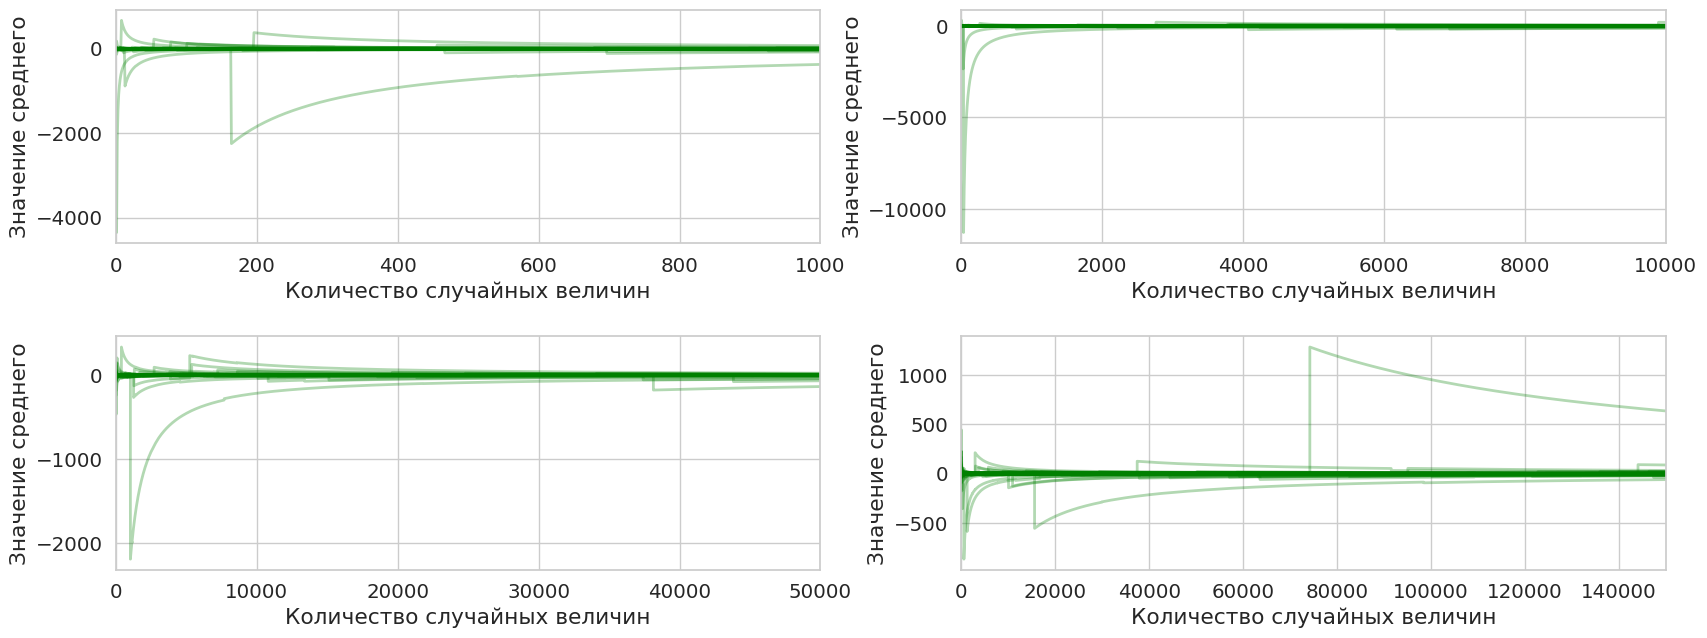

In [14]:
sizes = [1000, 10000, 50000, 150000] # количество случайных величин
samples_size = 200 # количество выборок
plt.figure(figsize=(20, 20))

for i in range(len(sizes)):
    samples = sps.cauchy().rvs(size=(samples_size, sizes[i]))
    cum_means = samples.cumsum(axis=1) / (np.arange(sizes[i]) + 1)
    plt.subplot(5, 2, i + 1)

    for j in range(samples_size):
        plt.plot(np.arange(sizes[i]) + 1, cum_means[j], color='green', alpha=0.3, lw=2)
    
    plt.subplots_adjust(hspace=0.4)
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение среднего")
    plt.xlim((0, sizes[i]))

Видим, что среднее находится около 0, однако практически для каждого количества случайных величин нашлась выборка, где среднее отклоняется от 0. Отсюда делаем вывод, что сходимости к среднему нет, а значит, закон больших чисел не выполняется. 

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

/home/daniil/anaconda3/envs/mipt-stats/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/daniil/anaconda3/envs/mipt-stats/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


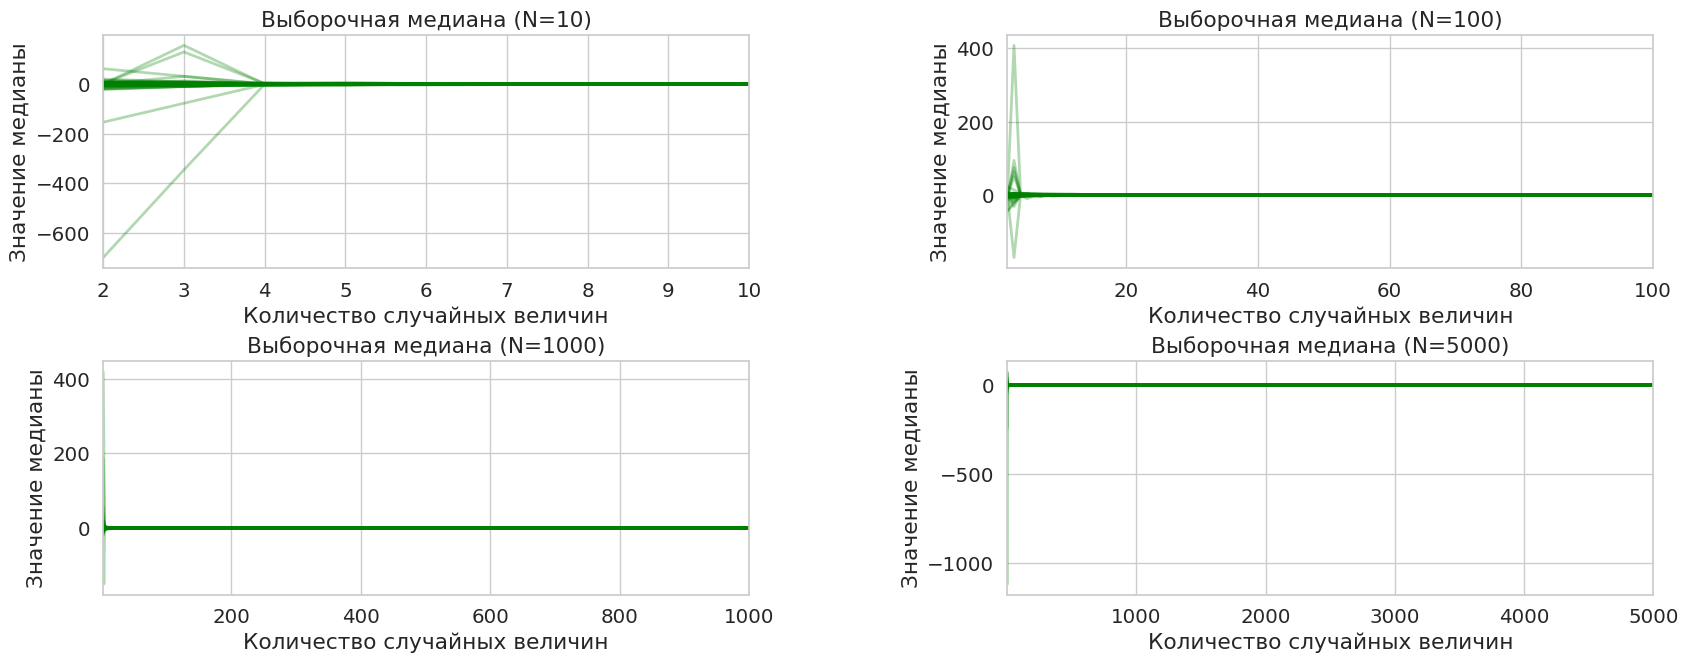

In [21]:
sizes = [10, 100, 1000, 5000] # количество случайных величин
samples_size = 200 # количество выборок
plt.figure(figsize=(20, 20))

for i in range(len(sizes)):
    samples = sps.cauchy().rvs(size=(samples_size, sizes[i]))
    medians = np.concatenate([np.median(samples[:, :t], axis=1).reshape(-1, 1) for t in range(sizes[i])], axis=1)
    plt.subplot(5, 2, i + 1)

    for j in range(samples_size):
        plt.plot(np.arange(sizes[i]) + 1, medians[j, :], color='green', alpha=0.3, lw=2)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение медианы")
    plt.xlim((2, sizes[i]))
    plt.title(f"Выборочная медиана (N={sizes[i]})")

Давайте посмотрим на графики поближе.

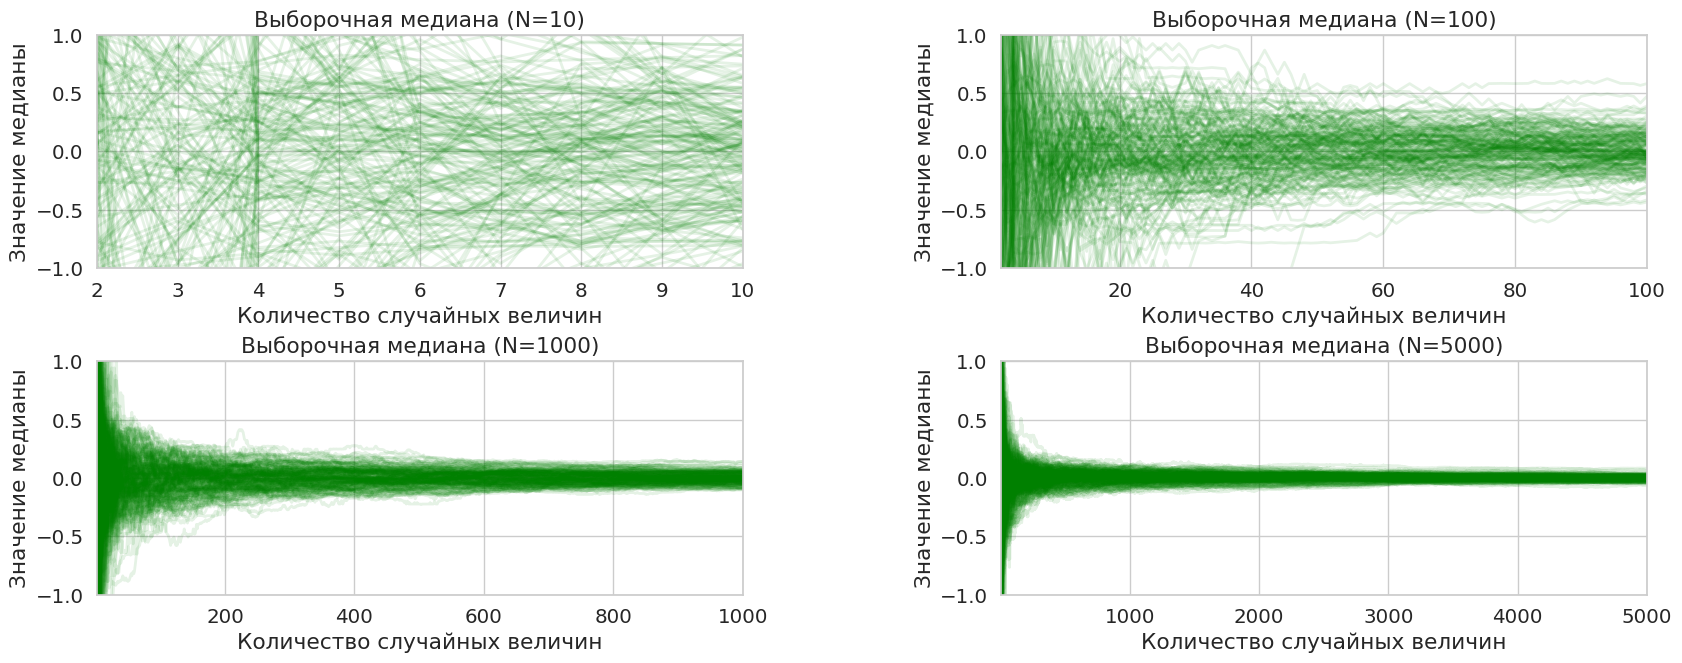

In [24]:
sizes = [10, 100, 1000, 5000] # количество случайных величин
samples_size = 200 # количество выборок
plt.figure(figsize=(20, 20))

for i in range(len(sizes)):
    samples = sps.cauchy().rvs(size=(samples_size, sizes[i]))
    medians = np.concatenate([np.median(samples[:, :t], axis=1).reshape(-1, 1) for t in range(sizes[i])], axis=1)
    plt.subplot(5, 2, i + 1)

    for j in range(samples_size):
        plt.plot(np.arange(sizes[i]) + 1, medians[j, :], color='green', alpha=0.1, lw=2)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.xlabel("Количество случайных величин")
    plt.ylabel("Значение медианы")
    plt.xlim((2, sizes[i]))
    plt.ylim((-1, 1))
    plt.title(f"Выборочная медиана (N={sizes[i]})")

Видим, что медиана сходится к 0.

**Вывод:**

- Мы выяснили, что для распределения Коши не выполняется закон больших чисел (у него тяжелые хвосты). Это совпадает и с теоретическими выкладками, где отсутствие у распределения конечного математического ожидания или дисперсии препятствует сходимости среднего значения выборки к какому-либо определенному числу.
- Однако медиана случайных величин сходится, причем чем больше случайных величин, тем меньше отклонения.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/lec9_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах (по тем осям, по которым это имеет смысл).

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

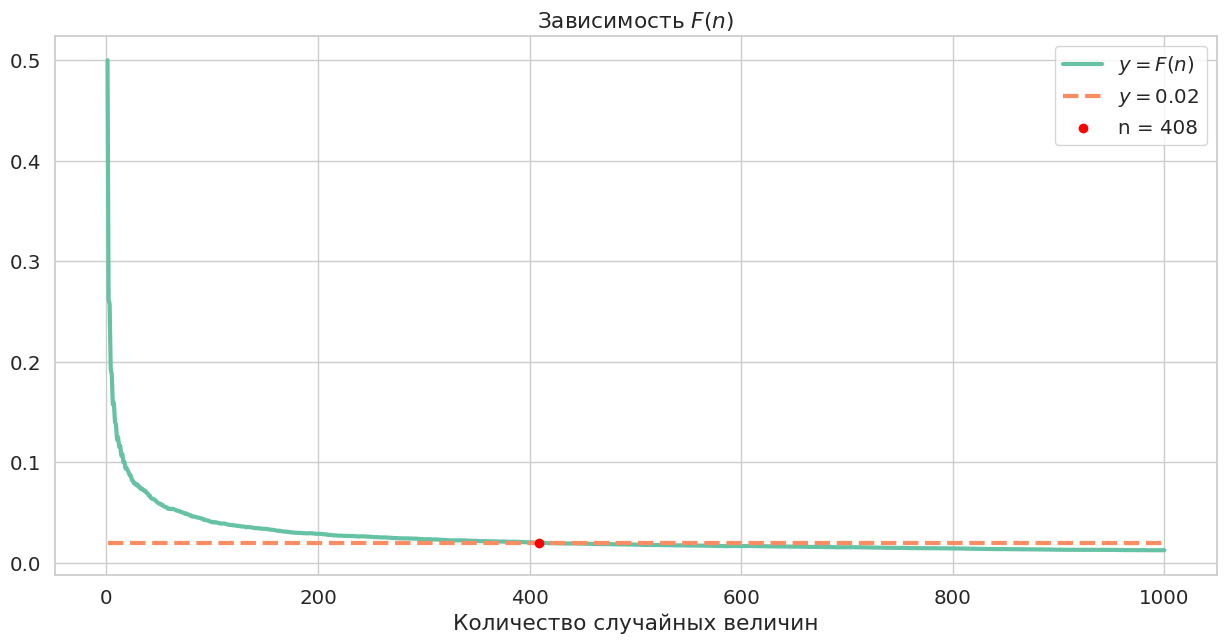

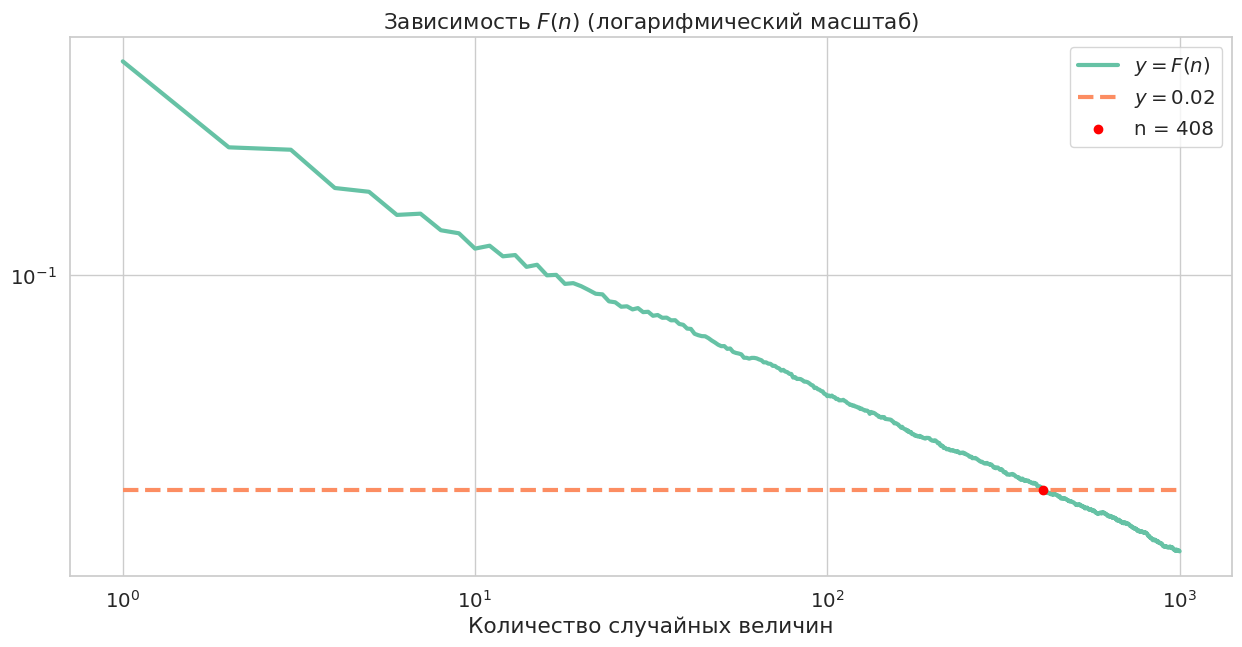

In [27]:
size = 1000
samples_count = 500  # количество выборок
a = 0.5

samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
F = np.abs(cum_means - a).sum(axis=0) / samples_count
n = np.argwhere(F <= 0.02)[0].item()

plt.figure(figsize=(15, 7))
plt.plot(np.arange(size) + 1, F, linewidth=3)
plt.plot(np.arange(size) + 1, np.zeros(size) + 0.02, linestyle='--', linewidth=3)
plt.scatter(x=n+1, y=F[n], color='red', zorder=3)

plt.xlabel('Количество случайных величин')
plt.legend(['$y = F(n)$', '$y = 0.02$', f'n = {n}'])
plt.title('Зависимость $F(n)$')
plt.show()

plt.figure(figsize=(15, 7))
plt.plot(np.arange(size) + 1, F, linewidth=3)
plt.plot(np.arange(size) + 1, np.zeros(size) + 0.02, linestyle='--', linewidth=3)
plt.scatter(x=n+1, y=F[n], color='red', zorder=3)
plt.xscale("log")
plt.yscale("log")


plt.xlabel('Количество случайных величин')
plt.legend(['$y = F(n)$', '$y = 0.02$', f'n = {n}'])
plt.title('Зависимость $F(n)$ (логарифмический масштаб)')
plt.show()

Видим, что средний размер выборки должен быть около 400.

**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

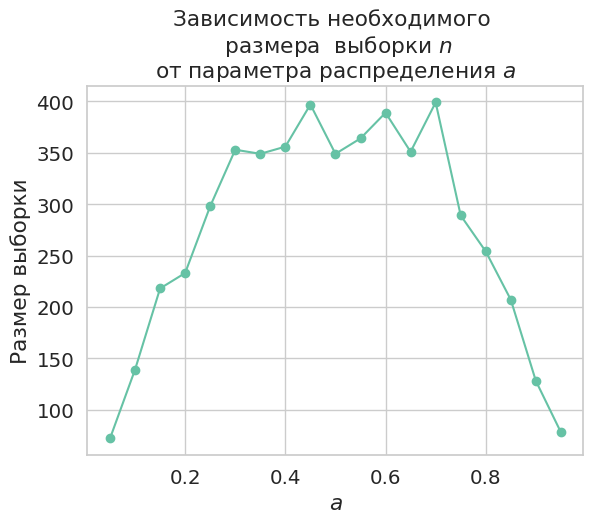

In [79]:
size = 1000
samples_count = 500  # количество выборок
p = np.arange(0.05, 1, 0.05)
n_arr = []

for i in range(p.shape[0]):
    a = p[i]
    samples = sps.bernoulli(p=a).rvs(size=(samples_count, size))
    cum_means = samples.cumsum(axis=1) / (np.arange(size) + 1)
    F = np.abs(cum_means - a).sum(axis=0) / samples_count
    n = np.argwhere(F <= 0.02)[0].item()
    n_arr.append(n)

plt.ylabel('Размер выборки')
plt.xlabel('$a$')
plt.title('Зависимость необходимого \n размера  выборки $n$' \
          '\nот параметра распределения $a$')
plt.plot(p, n_arr, marker='o')
plt.show()

График напоминает параболу с максимумом в районе `a=0.5`. Отсюда можно сделать вывод, что чем более равномерное распределение, тем медленнее устанавливается среднее с заданной точностью.

**Выводы:**

- Чем больше количество случайных величин, тем меньше отклонение выборочного среднего от истинного среднего. 
- Чем более равномерное распределение, тем больше нужна выборка, чтобы достигнуть нужной точности для выборочного среднего.